In [2]:
from sympy import *
from dtumathtools import dtuplot
init_printing()

In [3]:
k1, k2, kc, kb2, l1, l2, lg, it = symbols('k_1 k_2 k_c k_{b2} l_1 l_2 l_g I_t', real=True, positive=True)
m2, mr, g, u, w, t, phiu = symbols('m_2 m_r g u omega t phi_u', real=True, positive=True)
xi, ks, F0s, hp, cs = symbols('xi k_s F_{0s} h_p c_s', real=True, positive=True)
z_1, z_2, omega, t = symbols("z_1, z_2 omega t")

M = Matrix([[l2**(-2)*it, 0], [0, m2]])
K = Matrix([[k2 + (-g*lg*mr + k1*l1**2 + kc)/l2**2, -k2], [-k2, 2*F0s*(cs+1)/hp + k2 + 2*ks*(I*xi+1) + kb2]])
F = Matrix([l2**-1*u*omega**2*(sin(phiu)-I*cos(phiu)), 0])

In [4]:
z_1, z_2, omega, t = symbols("z_1, z_2 omega t")
k_1, k_2, k_3, k_4 = symbols("k_1, k_2 k_3 k_4")
m_1, m_2 = symbols("m_1, m_2")
f_1, f_2 = symbols("f_1, f_2")

k_1, k_2, k_3, k_4 = K[0], K[1], K[2], K[3]
m_1, m_2 = M[0], M[1]
f_1, f_2 = F[0], F[1]

z = Matrix([z_1, z_2])*exp(I*omega*t)
k = K -omega**2 * M
f = Matrix([f_1, f_2])

mydict = {g:9.81,kc:0.7,u:14.8*10**(-6),
          phiu:7,mr:0.616,m2:1.410,it:31.2*10**(-3),
          lg:0.188,l1:0.118,l2:0.263,
          kb2:0.72*10**(3),k1:1.66*10**3,k2:1.61*10**3,
          hp:12*10**(-3), cs:0.24}

v30 = {ks:0.83, xi:33/100, F0s:5.2}

sol = k.gauss_jordan_solve(f)[0]
x = sol.subs(mydict)
x = x.subs(v30)
x

⎡              4                          4                             2     
⎢6.5859408e-8⋅ω ⋅sin(7) - 6.5859408e-8⋅ⅈ⋅ω ⋅cos(7) - 0.000159105431008⋅ω ⋅sin(
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                 4                    2      
⎢                                  - 0.000527904⋅ω  + 3.5432830255584⋅ω  + 0.0
⎢                                                                             
⎢                                                                          2  
⎢                                                          - 7.5201168e-5⋅ω ⋅s
⎢                                  ───────────────────────────────────────────
⎢                                                 4                    2      
⎣                                  - 0.000527904⋅ω  + 3.5432830255584⋅ω  + 0.0

                     2                            2                           
7) - 2.558708064e-8⋅ω ⋅cos(7) - 2.558708064e-8⋅ⅈ⋅ω 

In [5]:
f

⎡ 2                        ⎤
⎢ω ⋅u⋅(sin(φᵤ) - ⅈ⋅cos(φᵤ))⎥
⎢──────────────────────────⎥
⎢            l₂            ⎥
⎢                          ⎥
⎣            0             ⎦

In [6]:
k.subs(mydict), f.subs(mydict)

⎛⎡                                      2                                     
⎜⎢1937.86021946248 - 0.451069120559788⋅ω                             -1610.0  
⎜⎢                                                                            
⎜⎢                                                                            
⎝⎣                -1610.0                  206.666666666667⋅F_{0s} + 2⋅kₛ⋅(ⅈ⋅ξ

                        ⎤  ⎡                     2                    ⎤⎞
                        ⎥  ⎢5.62737642585551e-5⋅ω ⋅(sin(7) - ⅈ⋅cos(7))⎥⎟
                        ⎥, ⎢                                          ⎥⎟
              2         ⎥  ⎣                    0                     ⎦⎟
 + 1) - 1.41⋅ω  + 2330.0⎦                                              ⎠

In [19]:
z1 = x[0]
z2 = x[1]
z_tilde = Matrix([z1, z2])
z_tilde

⎡              4                          4                             2     
⎢6.5859408e-8⋅ω ⋅sin(7) - 6.5859408e-8⋅ⅈ⋅ω ⋅cos(7) - 0.000159105431008⋅ω ⋅sin(
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                 4                    2      
⎢                                  - 0.000527904⋅ω  + 3.5432830255584⋅ω  + 0.0
⎢                                                                             
⎢                                                                          2  
⎢                                                          - 7.5201168e-5⋅ω ⋅s
⎢                                  ───────────────────────────────────────────
⎢                                                 4                    2      
⎣                                  - 0.000527904⋅ω  + 3.5432830255584⋅ω  + 0.0

                     2                            2                           
7) - 2.558708064e-8⋅ω ⋅cos(7) - 2.558708064e-8⋅ⅈ⋅ω 

---
## 5.3 
#### 30 grader

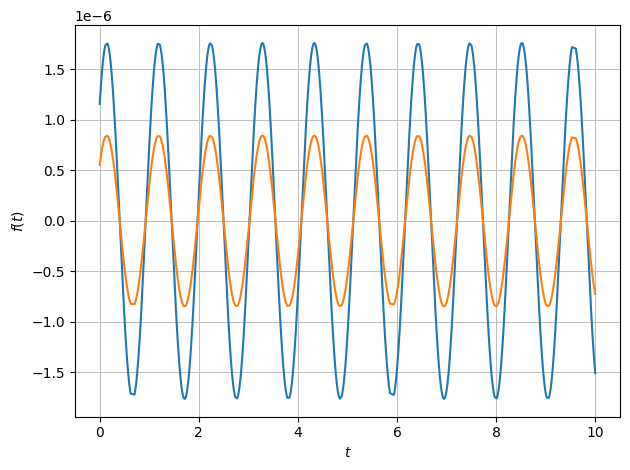

In [20]:
Ap1 = abs(z1)
Ap2 = abs(z2)

phip1 = arg(z1)
phip2 = arg(z2)

omegaer = [6, 7, 8, 9, 10.5]

yp = Matrix([Ap1*cos(omega*t+phip1), Ap2*cos(omega*t+phip2)])
yp = yp.subs(omega, 6)

dtuplot.plot(yp[0], yp[1], (t, 0, 10), legend=False)